# Ensemble Model - K-Means + Logistic Regression

- Is better to run a model for entire dataset or it's better to run a diferent model for each cluster ?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split as tts

[Dataset from Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)  

## 1. EDA and Feature Enginnering 

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\user\\Documents\\OMNP\\Ciencia de Dados com Python\\data-science-python')

In [3]:
df = pd.read_csv("Bases de Dados/credit_risk_dataset.csv", index_col = 0)
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(32581, 11)


person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y                           3  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4

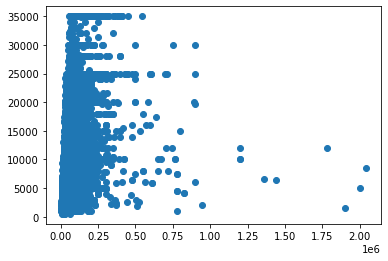

In [4]:
plt.scatter(df['person_income'], df['loan_amnt']);

In [5]:
df[df['person_income'] > 1000000]

person_age  person_income person_home_ownership  person_emp_length  \
17833          32        1200000              MORTGAGE                1.0   
29119          36        1200000                   OWN               16.0   
29120          40        1200000              MORTGAGE                1.0   
30049          42        2039784                  RENT                0.0   
31922          47        1362000              MORTGAGE                9.0   
31924          44        1440000              MORTGAGE                7.0   
32297          96        2000000              MORTGAGE               12.0   
32497          63        1782000                  RENT               13.0   
32546          60        1900000              MORTGAGE                5.0   

             loan_intent  loan_amnt  loan_int_rate  loan_status  \
17833            VENTURE      12000           7.51            0   
29119            MEDICAL      10000           6.54            0   
29120            MEDICAL      10000            NaN            0   
30049            VENTURE       8450          12.29            0   
31922            VENTURE       6600           7.74            0   
31924  DEBTCONSOLIDATION       6400           7.40            0   
32297           PERSONAL       5000          12.73            0   
32497          EDUCATION      12025          14.27            0   
32546           PERSONAL       1500            NaN            0   

       loan_percent_income cb_person_default_on_file  \
17833                 0.01                         N   
29119                 0.01                         N   
29120                 0.01                         N   
30049                 0.00                         Y   
31922                 0.00                         N   
31924                 0.00                         N   
32297                 0.00                         N   
32497                 0.01                         N   
32546                 0.00                         N   

       cb_person_cred_hist_length  
17833                           8  
29119                          11  
29120                          16  
30049                          15  
31922                          17  
31924                          15  
32297                          25  
32497                          30  
32546                          21

In [6]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.727970   6.595208e+04           4.789686   9589.371106   
std        6.256086   5.362760e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max       96.000000   2.039784e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Making some of the categorical columns become boolean

In [7]:
df['person_home_ownership'] = np.where(df['person_home_ownership'] == 'RENT', 0, 1)
df['cb_person_default_on_file'] = np.where(df['cb_person_default_on_file'] == 'Y', 1, 0)
df.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      0              123.0   
1          21           9600                      1                5.0   
2          25           9600                      1                1.0   
3          23          65500                      0                4.0   
4          24          54400                      0                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                          1                           3  
1                          0                           2  
2                          0                           3  
3                          0                           2  
4                          1                           4

In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df = df.fillna(df.mean())
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Scalling 

In [10]:
df['person_income'] = df['person_income'] / 1000
df['loan_amnt'] = df['loan_amnt'] / 1000
df = df.rename(columns = {'person_income':'person_income(k)', 'loan_amnt':'loan_amnt(k)'})
df.head()

person_age  person_income(k)  person_home_ownership  person_emp_length  \
0          22              59.0                      0              123.0   
1          21               9.6                      1                5.0   
2          25               9.6                      1                1.0   
3          23              65.5                      0                4.0   
4          24              54.4                      0                8.0   

  loan_intent  loan_amnt(k)  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL          35.0          16.02            1                 0.59   
1   EDUCATION           1.0          11.14            0                 0.10   
2     MEDICAL           5.5          12.87            1                 0.57   
3     MEDICAL          35.0          15.23            1                 0.53   
4     MEDICAL          35.0          14.27            1                 0.55   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                          1                           3  
1                          0                           2  
2                          0                           3  
3                          0                           2  
4                          1                           4

In [11]:
df.describe()

person_age  person_income(k)  person_home_ownership  \
count  32581.000000      32581.000000           32581.000000   
mean      27.727970         65.952078               0.495227   
std        6.256086         53.627595               0.499985   
min       20.000000          4.000000               0.000000   
25%       23.000000         38.500000               0.000000   
50%       26.000000         55.000000               0.000000   
75%       30.000000         79.200000               1.000000   
max       96.000000       2039.784000               1.000000   

       person_emp_length  loan_amnt(k)  loan_int_rate   loan_status  \
count       32581.000000  32581.000000   32581.000000  32581.000000   
mean            4.789686      9.589371      11.011695      0.218164   
std             4.085333      6.322087       3.081605      0.413006   
min             0.000000      0.500000       5.420000      0.000000   
25%             2.000000      5.000000       8.490000      0.000000   
50%             4.000000      8.000000      11.011695      0.000000   
75%             7.000000     12.200000      13.110000      0.000000   
max           123.000000     35.000000      23.220000      1.000000   

       loan_percent_income  cb_person_default_on_file  \
count         32581.000000               32581.000000   
mean              0.170203                   0.176330   
std               0.106782                   0.381106   
min               0.000000                   0.000000   
25%               0.090000                   0.000000   
50%               0.150000                   0.000000   
75%               0.230000                   0.000000   
max               0.830000                   1.000000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Removing higly correlated columns
- Avoid Multicolinearity

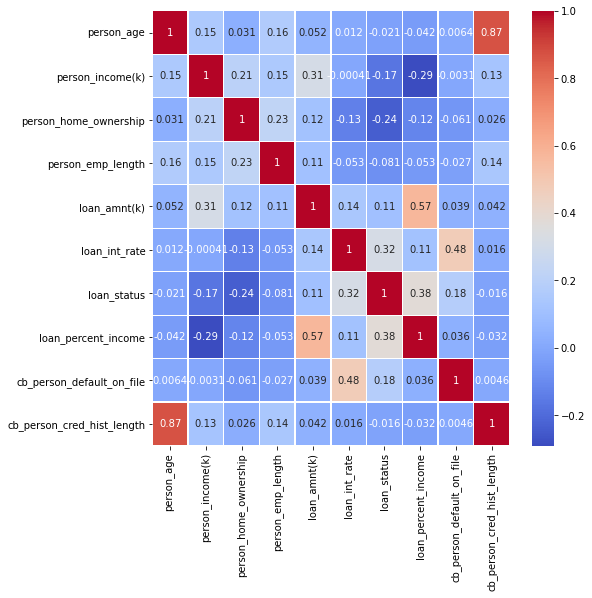

In [12]:
correl_hm = df.corr()

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(correl_hm, cmap = "coolwarm", annot=True, linewidths=.4, ax = ax);

In [13]:
correl_total = df.corr().abs()

superior = correl_total.where(np.triu(np.ones(correl_total.shape), 
                                      k = 1).astype(np.bool))

var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]

df = df.drop(df[var_remove], axis=1)
df.head()

person_age  person_income(k)  person_home_ownership  person_emp_length  \
0          22              59.0                      0              123.0   
1          21               9.6                      1                5.0   
2          25               9.6                      1                1.0   
3          23              65.5                      0                4.0   
4          24              54.4                      0                8.0   

  loan_intent  loan_amnt(k)  loan_int_rate  loan_status  \
0    PERSONAL          35.0          16.02            1   
1   EDUCATION           1.0          11.14            0   
2     MEDICAL           5.5          12.87            1   
3     MEDICAL          35.0          15.23            1   
4     MEDICAL          35.0          14.27            1   

   cb_person_default_on_file  
0                          1  
1                          0  
2                          0  
3                          0  
4                          1

## 2. Creating the Clusters with sklearn.KMeans

In [14]:
df2 = df.drop(['loan_intent', 'loan_status'],axis=1)
df2

person_age  person_income(k)  person_home_ownership  person_emp_length  \
0              22              59.0                      0              123.0   
1              21               9.6                      1                5.0   
2              25               9.6                      1                1.0   
3              23              65.5                      0                4.0   
4              24              54.4                      0                8.0   
...           ...               ...                    ...                ...   
32576          57              53.0                      1                1.0   
32577          54             120.0                      1                4.0   
32578          65              76.0                      0                3.0   
32579          56             150.0                      1                5.0   
32580          66              42.0                      0                2.0   

       loan_amnt(k)  loan_int_rate  cb_person_default_on_file  
0            35.000          16.02                          1  
1             1.000          11.14                          0  
2             5.500          12.87                          0  
3            35.000          15.23                          0  
4            35.000          14.27                          1  
...             ...            ...                        ...  
32576         5.800          13.16                          0  
32577        17.625           7.49                          0  
32578        35.000          10.99                          0  
32579        15.000          11.48                          0  
32580         6.475           9.99                          0  

[32581 rows x 7 columns]

In [15]:
model = KMeans(n_clusters=4, random_state=1)
cluster = model.fit(df2)
cluster.cluster_centers_

array([[2.82290432e+01, 9.19545981e+01, 6.41476445e-01, 5.51403829e+00,
        1.21491185e+01, 1.08989406e+01, 1.70568237e-01],
       [3.02474787e+01, 2.01498787e+02, 7.64158262e-01, 6.50696372e+00,
        1.62274050e+01, 1.13675161e+01, 1.86190846e-01],
       [4.08571429e+01, 8.67544163e+02, 7.14285714e-01, 7.52632013e+00,
        1.30469388e+01, 1.10455482e+01, 2.44897959e-01],
       [2.72959710e+01, 4.29573444e+01, 4.06291770e-01, 4.32162875e+00,
        7.91482242e+00, 1.10451345e+01, 1.78394119e-01]])

### Crosstab to check each how many cases of each cluster has defaulted.

In [16]:
crosstab = pd.crosstab(cluster.labels_, df['cb_person_default_on_file'])
print(crosstab[1][0]/(crosstab[0][0]+crosstab[1][0])*100)
print(crosstab[1][1]/(crosstab[0][1]+crosstab[1][1])*100)
print(crosstab[1][2]/(crosstab[0][2]+crosstab[1][2])*100)
print(crosstab[1][3]/(crosstab[0][3]+crosstab[1][3])*100)
crosstab

17.05252918287938
18.619084561675717
24.489795918367346
17.840957878166293


cb_person_default_on_file      0     1
row_0                                 
0                           8527  1753
1                           1049   240
2                             37    12
3                          17223  3740

### Crosstab to check each how many cases of each cluster was conceded credit.

In [17]:
crosstab = pd.crosstab(cluster.labels_, df["loan_status"])
print(crosstab[1][0]/(crosstab[0][0]+crosstab[1][0])*100)
print(crosstab[1][1]/(crosstab[0][1]+crosstab[1][1])*100)
print(crosstab[1][2]/(crosstab[0][2]+crosstab[1][2])*100)
print(crosstab[1][3]/(crosstab[0][3]+crosstab[1][3])*100)
crosstab

11.69260700389105
9.542280837858804
12.244897959183673
27.558078519295904


loan_status      0     1
row_0                   
0             9078  1202
1             1166   123
2               43     6
3            15186  5777

### Creating cluster column in main dataframe

In [18]:
df['cluster'] = cluster.labels_
df.head()

person_age  person_income(k)  person_home_ownership  person_emp_length  \
0          22              59.0                      0              123.0   
1          21               9.6                      1                5.0   
2          25               9.6                      1                1.0   
3          23              65.5                      0                4.0   
4          24              54.4                      0                8.0   

  loan_intent  loan_amnt(k)  loan_int_rate  loan_status  \
0    PERSONAL          35.0          16.02            1   
1   EDUCATION           1.0          11.14            0   
2     MEDICAL           5.5          12.87            1   
3     MEDICAL          35.0          15.23            1   
4     MEDICAL          35.0          14.27            1   

   cb_person_default_on_file  cluster  
0                          1        3  
1                          0        3  
2                          0        3  
3                          0        0  
4                          1        3

## One hot encoding 'loan_intent' column

In [19]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [20]:
df = pd.get_dummies(df, columns=["loan_intent"], prefix="Intent")
df.head()

person_age  person_income(k)  person_home_ownership  person_emp_length  \
0          22              59.0                      0              123.0   
1          21               9.6                      1                5.0   
2          25               9.6                      1                1.0   
3          23              65.5                      0                4.0   
4          24              54.4                      0                8.0   

   loan_amnt(k)  loan_int_rate  loan_status  cb_person_default_on_file  \
0          35.0          16.02            1                          1   
1           1.0          11.14            0                          0   
2           5.5          12.87            1                          0   
3          35.0          15.23            1                          0   
4          35.0          14.27            1                          1   

   cluster  Intent_DEBTCONSOLIDATION  Intent_EDUCATION  \
0        3                         0                 0   
1        3                         0                 1   
2        3                         0                 0   
3        0                         0                 0   
4        3                         0                 0   

   Intent_HOMEIMPROVEMENT  Intent_MEDICAL  Intent_PERSONAL  Intent_VENTURE  
0                       0               0                1               0  
1                       0               0                0               0  
2                       0               1                0               0  
3                       0               1                0               0  
4                       0               1                0               0

## 3. Predicting Credit Concession

### Running one Model for entire dataset

In [21]:
x = df.drop(['loan_status'], axis= 1)
y = df['loan_status']

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 1)

In [22]:
model = LogisticRegression(random_state=1)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

In [49]:
print(confusion_matrix(y_test, y_pred_test))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test))
entire_dataset_score =  round(metrics.accuracy_score(y_test, y_pred_test),3)

[[4192  344]
 [ 836  917]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4536
           1       0.73      0.52      0.61      1753

    accuracy                           0.81      6289
   macro avg       0.78      0.72      0.74      6289
weighted avg       0.80      0.81      0.80      6289



---
## 4. Running a model for each cluster

### Predicting Credit Concession for cluster 0

In [50]:
cluster = df[df['cluster'] == 0]

x = cluster.drop(['loan_status'], axis= 1)
y = cluster['loan_status']

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 1)

In [51]:
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

In [52]:
print(confusion_matrix(y_test, y_pred_test))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test))
cluster0_score =  round(metrics.accuracy_score(y_test, y_pred_test),3)

[[2686   39]
 [ 269   90]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2725
           1       0.70      0.25      0.37       359

    accuracy                           0.90      3084
   macro avg       0.80      0.62      0.66      3084
weighted avg       0.88      0.90      0.88      3084



---
### Predicting Credit Concession for cluster 1

In [53]:
cluster = df[df['cluster'] == 1]

x = cluster.drop(['loan_status'], axis= 1)
y = cluster['loan_status']

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 1)

In [54]:
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

In [55]:
print(confusion_matrix(y_test, y_pred_test))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test))
cluster1_score =  round(metrics.accuracy_score(y_test, y_pred_test),3)

[[347  10]
 [ 17  13]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       357
           1       0.57      0.43      0.49        30

    accuracy                           0.93       387
   macro avg       0.76      0.70      0.73       387
weighted avg       0.92      0.93      0.93       387



---
### Predicting Credit Concession for cluster 3

In [56]:
cluster = df[df['cluster'] == 3]

x = cluster.drop(['loan_status'], axis= 1)
y = cluster['loan_status']

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 1)

In [57]:
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

In [58]:
print(confusion_matrix(y_test, y_pred_test))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test))
print("--------------------------------------------------------------------------------")
cluster3_score =  round(metrics.accuracy_score(y_test, y_pred_test),3)

[[4192  344]
 [ 836  917]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4536
           1       0.73      0.52      0.61      1753

    accuracy                           0.81      6289
   macro avg       0.78      0.72      0.74      6289
weighted avg       0.80      0.81      0.80      6289

--------------------------------------------------------------------------------


---
### Dealing with cluster 2
- There is too little data in cluster 2 to run a reliable model.
- Due to high income and low credit request, maybe is better to grant automatically the credit for cases in cluster where there is no default on file.
- For cases where there is default on file, request credit analyst to further investigate.

In [59]:
cluster2 = df[df['cluster'] == 2]
cluster2.describe()

person_age  person_income(k)  person_home_ownership  person_emp_length  \
count   49.000000         49.000000              49.000000          49.000000   
mean    40.857143        867.544163               0.714286           7.526320   
std     11.840960        382.299174               0.456435           5.379963   
min     28.000000        540.600000               0.000000           0.000000   
25%     34.000000        612.000000               0.000000           3.000000   
50%     37.000000        762.000000               1.000000           7.000000   
75%     43.000000        900.000000               1.000000          12.000000   
max     96.000000       2039.784000               1.000000          19.000000   

       loan_amnt(k)  loan_int_rate  loan_status  cb_person_default_on_file  \
count     49.000000      49.000000    49.000000                  49.000000   
mean      13.046939      11.045548     0.122449                   0.244898   
std        8.613417       2.552701     0.331201                   0.434483   
min        1.000000       6.540000     0.000000                   0.000000   
25%        6.400000       9.010000     0.000000                   0.000000   
50%       10.000000      11.011695     0.000000                   0.000000   
75%       19.600000      12.730000     0.000000                   0.000000   
max       35.000000      17.190000     1.000000                   1.000000   

       cluster  Intent_DEBTCONSOLIDATION  Intent_EDUCATION  \
count     49.0                 49.000000         49.000000   
mean       2.0                  0.183673          0.061224   
std        0.0                  0.391230          0.242226   
min        2.0                  0.000000          0.000000   
25%        2.0                  0.000000          0.000000   
50%        2.0                  0.000000          0.000000   
75%        2.0                  0.000000          0.000000   
max        2.0                  1.000000          1.000000   

       Intent_HOMEIMPROVEMENT  Intent_MEDICAL  Intent_PERSONAL  Intent_VENTURE  
count               49.000000       49.000000        49.000000       49.000000  
mean                 0.102041        0.285714         0.265306        0.102041  
std                  0.305839        0.456435         0.446071        0.305839  
min                  0.000000        0.000000         0.000000        0.000000  
25%                  0.000000        0.000000         0.000000        0.000000  
50%                  0.000000        0.000000         0.000000        0.000000  
75%                  0.000000        1.000000         1.000000        0.000000  
max                  1.000000        1.000000         1.000000        1.000000

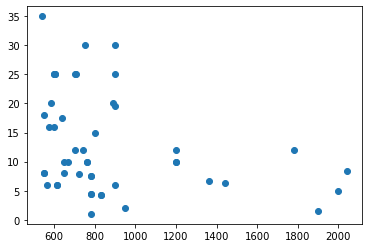

In [60]:
plt.scatter(cluster2['person_income(k)'], cluster2['loan_amnt(k)']);

In [61]:
smallest_income = cluster2.describe()['person_income(k)']['min']
smallest_income

540.6

In [62]:
highest_credit_request = cluster2.describe()['loan_amnt(k)']['max']
highest_credit_request

35.0

In [63]:
ratio = highest_credit_request/smallest_income*100
round(ratio,2)

6.47

In [64]:
default_percent = cluster2.describe()['cb_person_default_on_file']['mean']*100
round(default_percent,2)

24.49

## 5. Comparing Scores

In [67]:
print("Accuracy Entire Dataset:", entire_dataset_score)
print("--------------------------------------------------------------------------------")

Acuracy Entire Dataset: 0.812
--------------------------------------------------------------------------------


In [70]:
print("Accuracy for cluster0:", cluster0_score)
print("--------------------------------------------------------------------------------")
print("Accuracy for cluster1:", cluster1_score)
print("--------------------------------------------------------------------------------")
print("cluster2 has too little data for running a model.")
print("--------------------------------------------------------------------------------")
print("Accuracy for cluster3:", cluster3_score)
print("--------------------------------------------------------------------------------")

Acuracy for cluster0: 0.9
--------------------------------------------------------------------------------
Acuracy for cluster1: 0.93
--------------------------------------------------------------------------------
cluster2 has too little data for running a model.
--------------------------------------------------------------------------------
Acuracy for cluster3: 0.812
--------------------------------------------------------------------------------


## 6. Conclusion:
- The largest cluster (cluster3) has the same score as the entire dataset.
- Both cluster0 and cluster1 have a big improvement in the score.
- To analyze whether the improvement in the score pays off, the excess computational consumption is higher than the financial gain of the model.